# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [1]:
def f(x):
    return (x**2)*numpy.sin(x)
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    return -(x**2)*numpy.cos(x)+2*x*numpy.sin(x)+2*numpy.cos(x)-2
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [11]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [12]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [21]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmax - xmin)/(2*N)
    x=xmin
    f1, f2, f3 = 0,0,0
    for i in range(0,N):
        xtop = xmin + 2*dx*i + 2*dx #this calculates the upper end x value of the panel
        xmid= xmin + dx*2*i + dx #this calculates the middle x value of the panel
        xbottom = xmin + 2*dx*i #this calculates the lower end x value of the panel
        f1 += f(xbottom) # this calculates the upper end function value 
        f2 += 4*f(xmid) #this calculates the middle end function value and multiplies by 4 as in the formula
        f3 += f(xtop) #this calculates the lower end function value 
    return ((dx/3)*(f1+f2+f3))
    
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE

Make sure you have implemented Simpson's rule correctly:

In [22]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [23]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


<function matplotlib.pyplot.show>

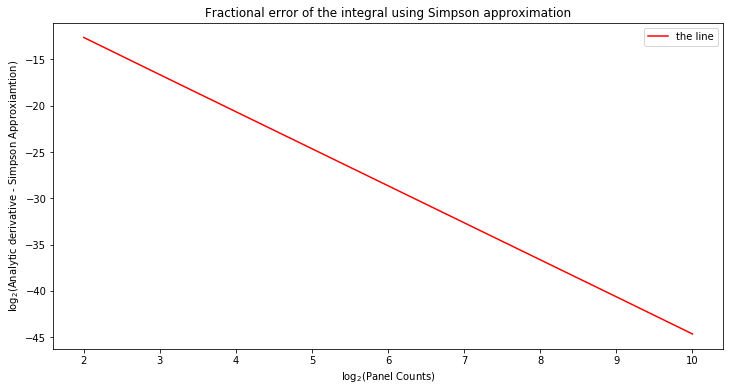

In [24]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
x = numpy.log2(panel_counts)
y=[]
for i in range (0,len(panel_counts)):
    val = numpy.log2((result_analytic-integrate_numeric(x0,x1,panel_counts[i]))/result_analytic) #this calculates the 
    y.append(val) #adds the values to the list of y to be plotted
plt.figure(figsize=(12, 6)) 
plt.plot(x, y, color='red', label='the line') #this creates the line
plt.legend(loc='best') #this postions a legend
plt.title('Fractional error of the integral using Simpson approximation') #this adds a title
plt.xlabel('log$_2$(Panel Counts)') #this labels the x-axis
plt.ylabel('log$_2$(Analytic derivative - Simpson Approxiamtion)') #this labels the y-axis
plt.show #this displays the graph


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels used to calculate the numeric integration increases the accuracy as it reaches a closer approximation to the analytic integral. However, as the number of panels gets even larger there can be problems with the numerical precision held by the program.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the number of panels for trapezium will increase the accuracy as the integration scales proportional to $N^{-2}$ until their becomes a problem with precision. The accuracy is not as good as Simpsons rule.